<h1 align="center">Principles of Big Data Management</h1>
<h2>Course Project</h2>
<h3 align="right">Rahul Tata</h3> 
<h3 align="right">AP19110010051</h3> 
<h3 align="right">CSE A</h3> 

Installing Required Packages

In [1]:
install.packages("ggplot2")
install.packages("reshape2")
install.packages("tree")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




Importing Libraries and uploading dataset

In [4]:
library("ggplot2")
library("reshape2")
library("caret")
library("tree")
mydata = read.csv("project.csv", header = TRUE)
head(mydata, 8)

,name,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitter,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,⋯,ShimmerDDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,⋯,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,⋯,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,⋯,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,⋯,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,⋯,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,⋯,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
7,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,⋯,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
8,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,⋯,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755


Dimmenssions and types in Dataframe

In [5]:
str(mydata)

'data.frame':	195 obs. of  24 variables:
 $ name         : chr  "phon_R01_S01_1" "phon_R01_S01_2" "phon_R01_S01_3" "phon_R01_S01_4" ...
 $ MDVPFoHz     : num  120 122 117 117 116 ...
 $ MDVPFhiHz    : num  157 149 131 138 142 ...
 $ MDVPFloHz    : num  75 114 112 111 111 ...
 $ MDVPJitter   : num  0.00784 0.00968 0.0105 0.00997 0.01284 ...
 $ MDVPJitterAbs: num  0.00007 0.00008 0.00009 0.00009 0.00011 0.00008 0.00003 0.00003 0.00006 0.00006 ...
 $ MDVPRAP      : num  0.0037 0.00465 0.00544 0.00502 0.00655 0.00463 0.00155 0.00144 0.00293 0.00268 ...
 $ MDVPPPQ      : num  0.00554 0.00696 0.00781 0.00698 0.00908 0.0075 0.00202 0.00182 0.00332 0.00332 ...
 $ JitterDDP    : num  0.0111 0.0139 0.0163 0.015 0.0197 ...
 $ MDVPShimmer  : num  0.0437 0.0613 0.0523 0.0549 0.0643 ...
 $ MDVPShimmerdB: num  0.426 0.626 0.482 0.517 0.584 0.456 0.14 0.134 0.191 0.255 ...
 $ ShimmerAPQ3  : num  0.0218 0.0313 0.0276 0.0292 0.0349 ...
 $ ShimmerAPQ5  : num  0.0313 0.0452 0.0386 0.0401 0.0483 ...
 $ MDV

Columns in dataframe

In [6]:
colnames(mydata)

[1] "name"          "MDVPFoHz"      "MDVPFhiHz"     "MDVPFloHz"    
 [5] "MDVPJitter"    "MDVPJitterAbs" "MDVPRAP"       "MDVPPPQ"      
 [9] "JitterDDP"     "MDVPShimmer"   "MDVPShimmerdB" "ShimmerAPQ3"  
[13] "ShimmerAPQ5"   "MDVPAPQ"       "ShimmerDDA"    "NHR"          
[17] "HNR"           "status"        "RPDE"          "DFA"          
[21] "spread1"       "spread2"       "D2"            "PPE"

Checking for null values

In [7]:
any(is.na(mydata))

[1] FALSE

Basic statistics of data

In [8]:
summary(mydata)

     name              MDVPFoHz        MDVPFhiHz       MDVPFloHz     
 Length:195         Min.   : 88.33   Min.   :102.1   Min.   : 65.48  
 Class :character   1st Qu.:117.57   1st Qu.:134.9   1st Qu.: 84.29  
 Mode  :character   Median :148.79   Median :175.8   Median :104.31  
                    Mean   :154.23   Mean   :197.1   Mean   :116.32  
                    3rd Qu.:182.77   3rd Qu.:224.2   3rd Qu.:140.02  
                    Max.   :260.11   Max.   :592.0   Max.   :239.17  
   MDVPJitter       MDVPJitterAbs          MDVPRAP            MDVPPPQ        
 Min.   :0.001680   Min.   :7.000e-06   Min.   :0.000680   Min.   :0.000920  
 1st Qu.:0.003460   1st Qu.:2.000e-05   1st Qu.:0.001660   1st Qu.:0.001860  
 Median :0.004940   Median :3.000e-05   Median :0.002500   Median :0.002690  
 Mean   :0.006220   Mean   :4.396e-05   Mean   :0.003306   Mean   :0.003446  
 3rd Qu.:0.007365   3rd Qu.:6.000e-05   3rd Qu.:0.003835   3rd Qu.:0.003955  
 Max.   :0.033160   Max.   :2.600e-04   Ma

In [9]:
head(mydata)

,name,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitter,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,⋯,ShimmerDDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,⋯,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,⋯,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,⋯,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,⋯,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,⋯,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,⋯,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


Setting size of graph/plots

In [10]:
options(repr.plot.width = 25, repr.plot.height = 15)

Finding correlation between every variable

In [11]:
cormat = round(cor(subset(mydata, select = -c(name))),2)
melted_cormat = melt(cormat)
melted_cormat

Var1,Var2,value
<fct>,<fct>,<dbl>
MDVPFoHz,MDVPFoHz,1.00
MDVPFhiHz,MDVPFoHz,0.40
MDVPFloHz,MDVPFoHz,0.60
MDVPJitter,MDVPFoHz,-0.12
MDVPJitterAbs,MDVPFoHz,-0.38
MDVPRAP,MDVPFoHz,-0.08
MDVPPPQ,MDVPFoHz,-0.11
JitterDDP,MDVPFoHz,-0.08
MDVPShimmer,MDVPFoHz,-0.10


Turning the corelation values into a hetmap

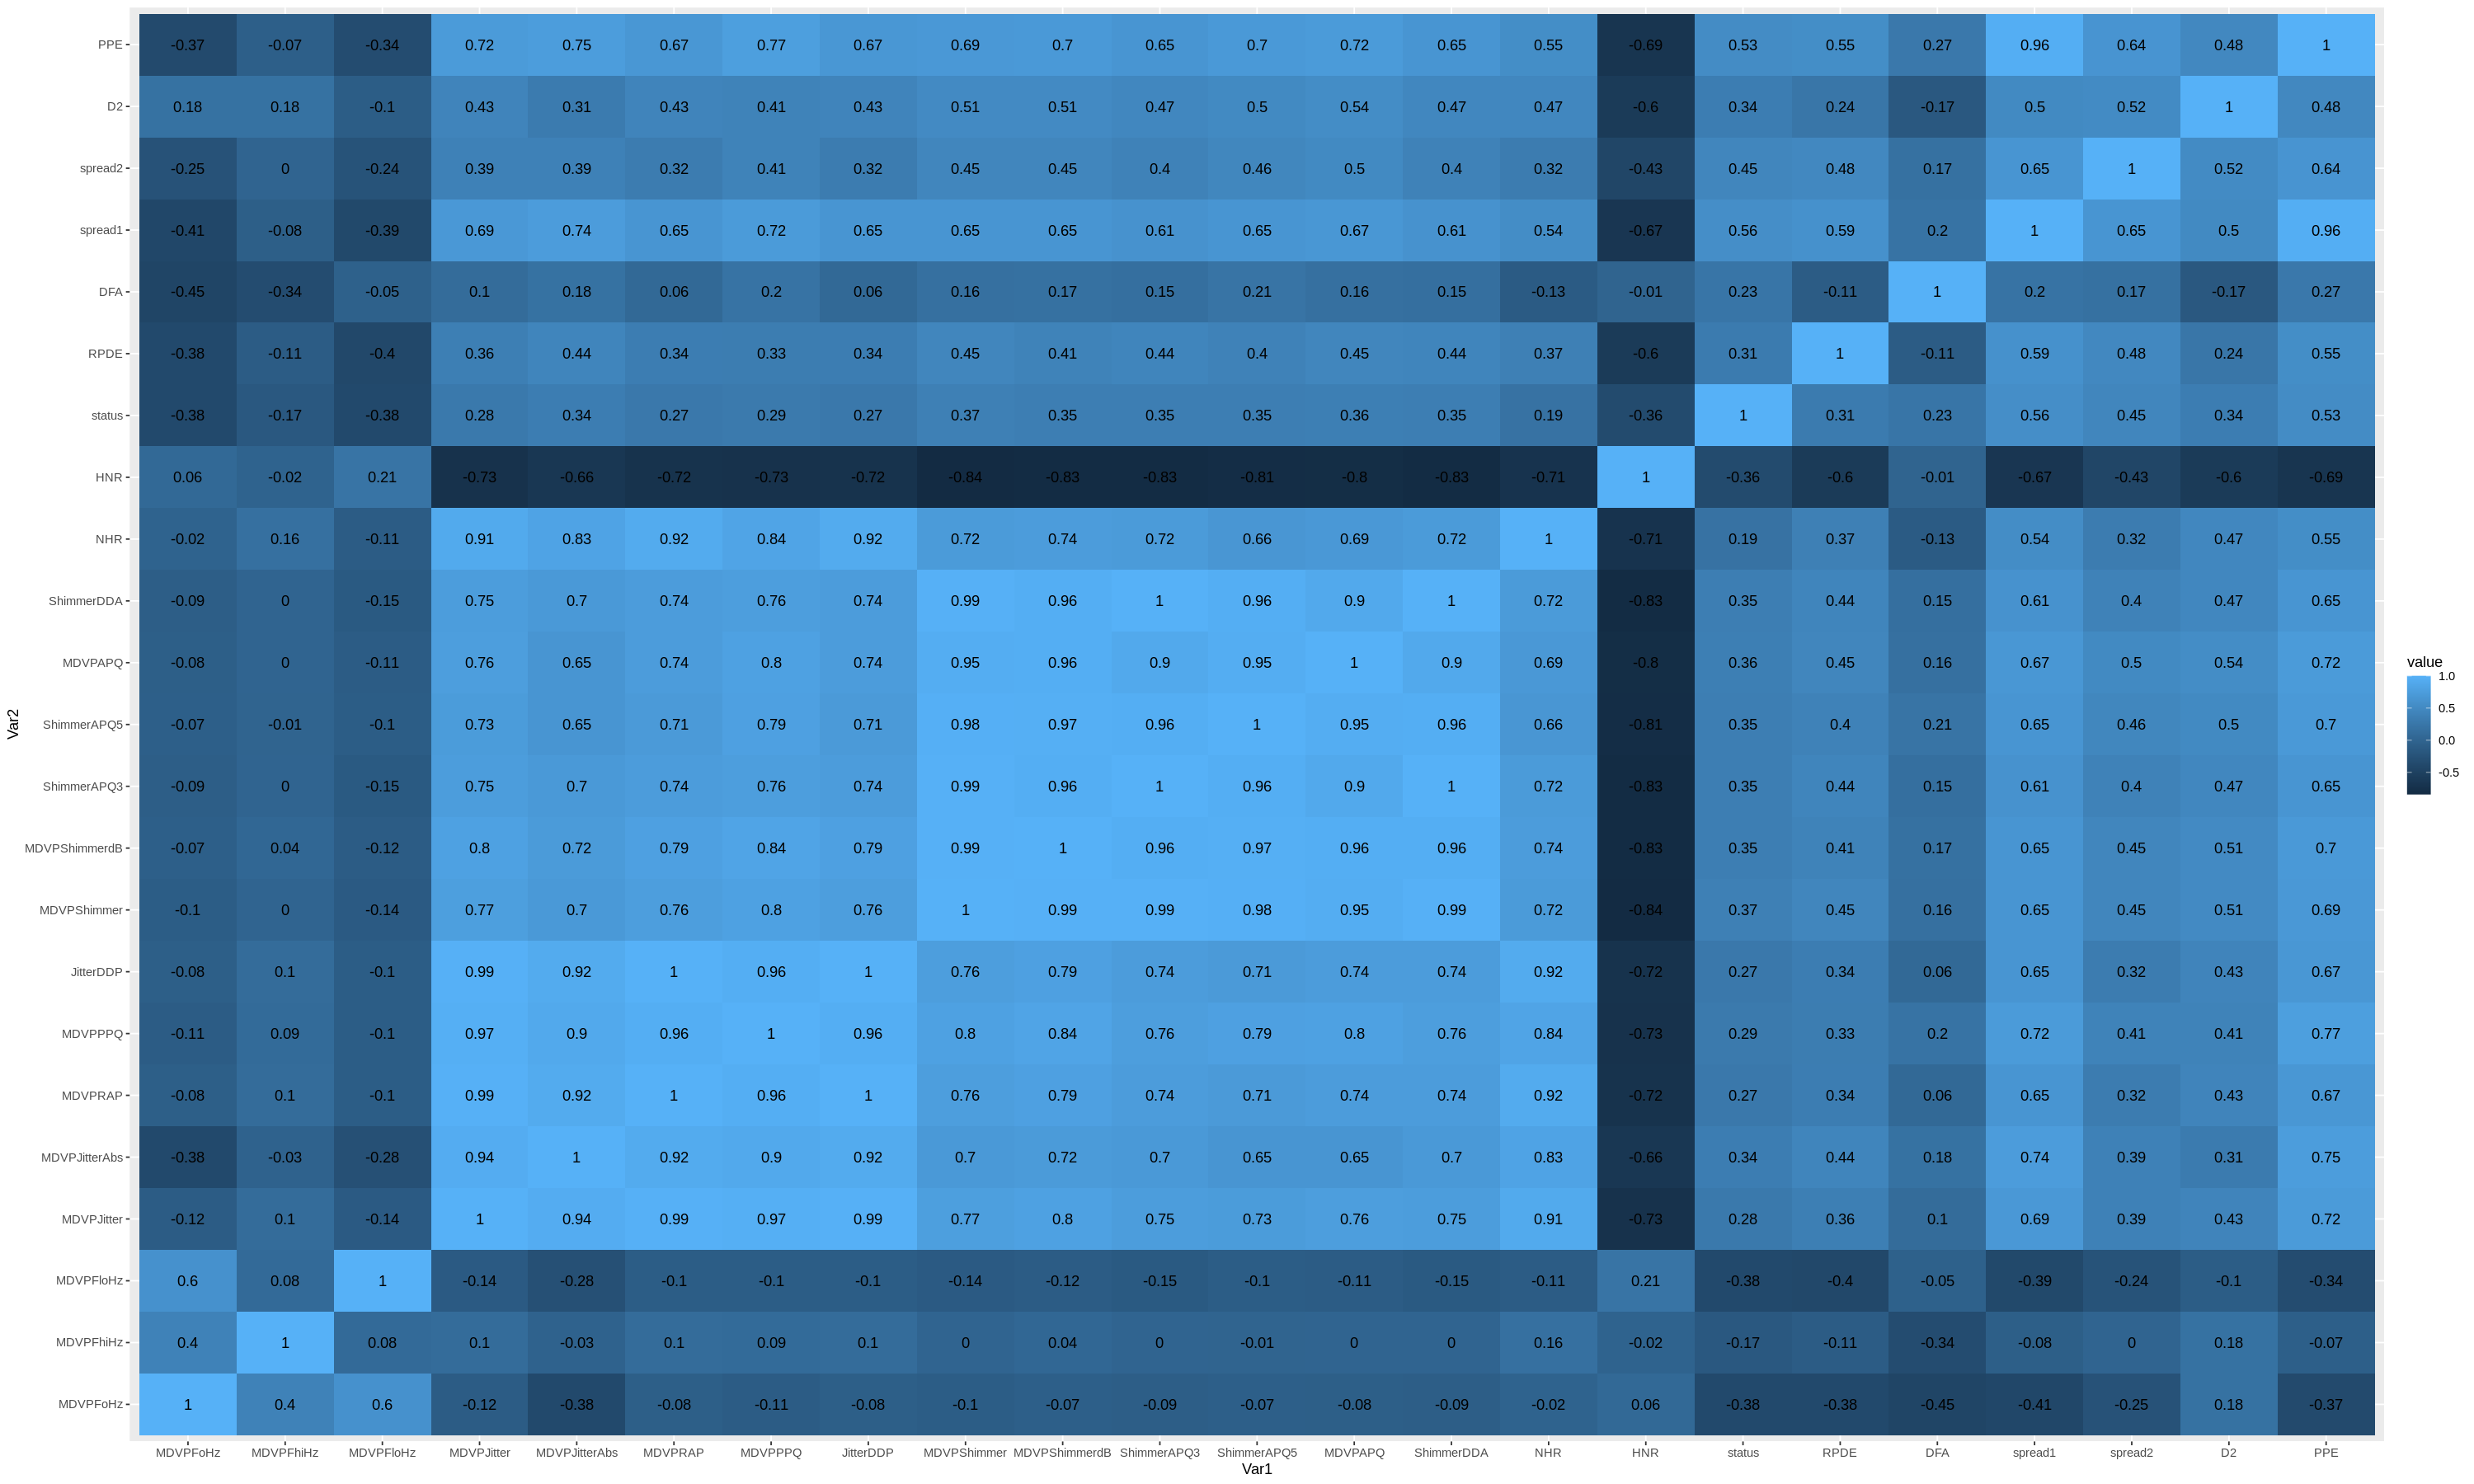

In [12]:
plot1 = ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + geom_tile(aes(fill = value)) +  geom_text(aes(label = value))
plot1

Removing unwanted columns/attributes

In [13]:
mydata = subset(mydata, select = -c(name, MDVPJitter, ShimmerAPQ5, ShimmerDDA))
head(mydata)

,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,MDVPShimmerdB,ShimmerAPQ3,MDVPAPQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,119.992,157.302,74.997,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.02971,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04368,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03590,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.03772,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04465,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,120.552,131.162,113.787,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03243,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


Dividing the dataset into class and non-class datasets 

In [14]:
x = subset(mydata, select = -c(status))
head(x)

,MDVPFoHz,MDVPFhiHz,MDVPFloHz,MDVPJitterAbs,MDVPRAP,MDVPPPQ,JitterDDP,MDVPShimmer,MDVPShimmerdB,ShimmerAPQ3,MDVPAPQ,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,119.992,157.302,74.997,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.02971,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04368,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03590,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.03772,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04465,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
6,120.552,131.162,113.787,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03243,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [15]:
y = subset(mydata, select = c(status))
head(y)

,status
,<int>
1,1
2,1
3,1
4,1
5,1
6,1


Dividing the the datasets into training and testing 

In [16]:
smp_size <- floor(0.75 * nrow(mydata))
set.seed(123)
train_ind <- sample(seq_len(nrow(mydata)), size = smp_size)
train <- mydata[train_ind, ]
test <- mydata[-train_ind, ]

In [17]:
x_train = subset(train, select = -c(status))
y_train = subset(train, select = c(status))
x_test = subset(test, select = -c(status))
y_test = subset(test, select = c(status))

Making a decission tree Model

In [18]:
tree_model = tree(status~MDVPFoHz+MDVPFhiHz+MDVPFloHz+MDVPJitterAbs+MDVPRAP+MDVPPPQ+JitterDDP+MDVPShimmer+MDVPShimmerdB+ShimmerAPQ3+MDVPAPQ+NHR+HNR+RPDE+DFA+spread1+spread2+D2+PPE, data=train)

NULL

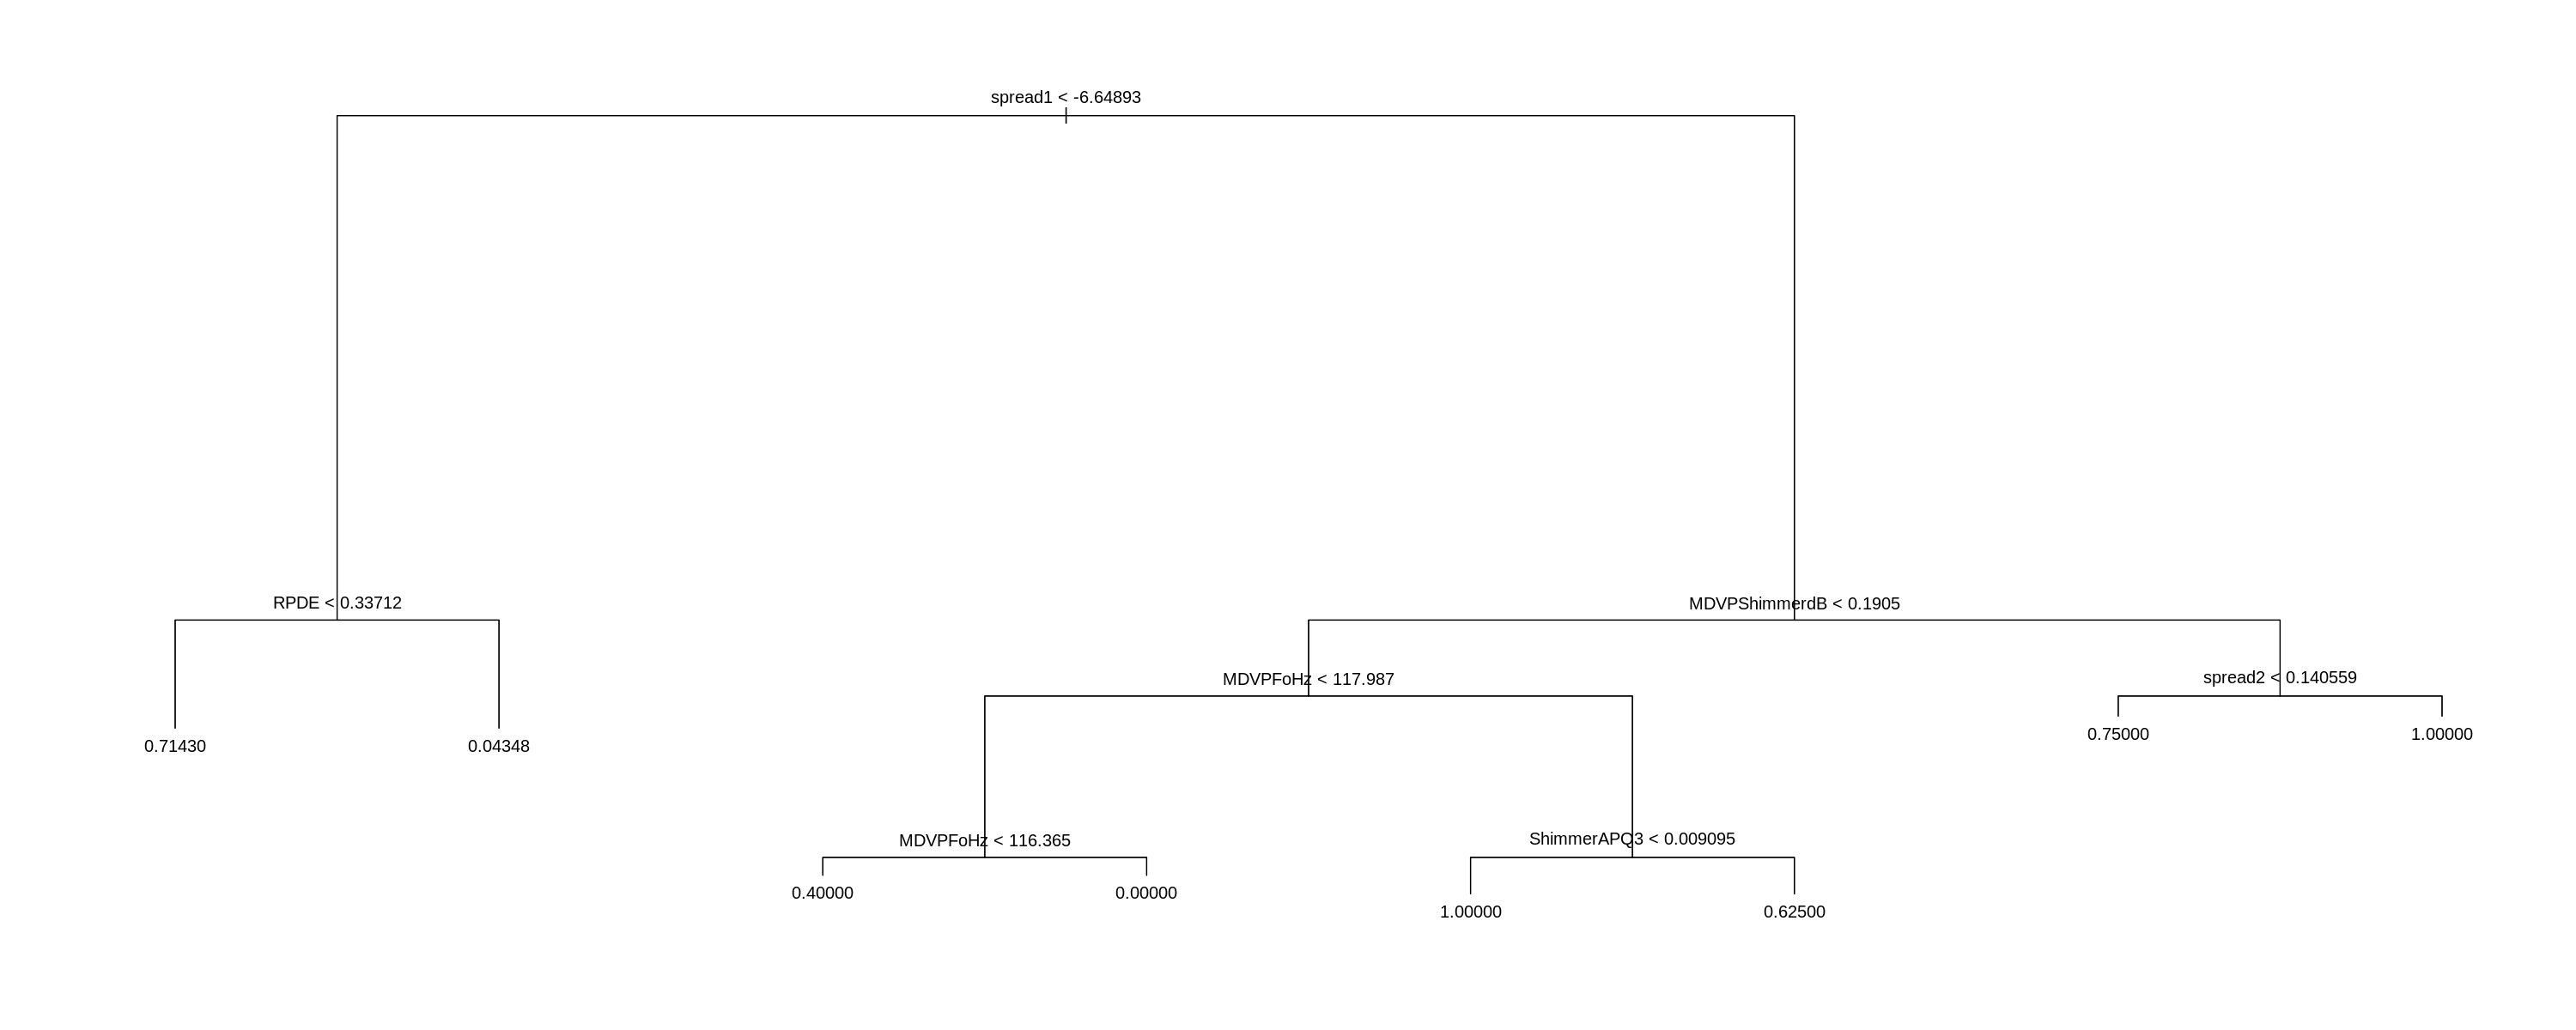

In [19]:
options(repr.plot.width =25, repr.plot.height = 10)
plot(tree_model)
decission_tree = text(tree_model, pretty = 1)
decission_tree

Predicting values using decision tree

In [20]:
tree_prediction = predict(tree_model, x_test)

Normalizing the output

In [21]:
for(i in 1:49){
  if (tree_prediction[i]<0.5){
    tree_prediction[i]=0
  }
  else{
    tree_prediction[i]=1
  }
}

Constructing confusion matrix

In [22]:
expected = c(y_test$status)
tree_table = table(expected, tree_prediction)
tree_table

        tree_prediction
expected  0  1
       0  8  3
       1  2 36

Changing the size of plot/graph

In [23]:
options(repr.plot.width = 5, repr.plot.height = 5)

Visualizing the confusion matrix

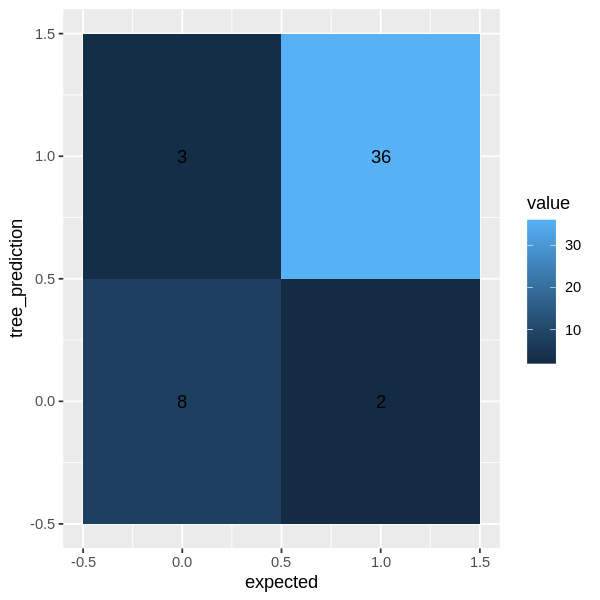

In [24]:
mat_tree = melt(tree_table)
plot1 = ggplot(data = mat_tree, aes(x=expected, y=tree_prediction, fill=value)) + geom_tile(aes(fill = value)) +  geom_text(aes(label = value))
plot1

Constructing a logistic regresssion model

In [25]:
logistic_model = glm(status~MDVPFoHz+MDVPFhiHz+MDVPFloHz+MDVPJitterAbs+MDVPRAP+MDVPPPQ+JitterDDP+MDVPShimmer+MDVPShimmerdB+ShimmerAPQ3+MDVPAPQ+NHR+HNR+RPDE+DFA+spread1+spread2+D2+PPE, data=train)

Predicting values using logistic regression model

In [26]:
logistic_prediction = predict(logistic_model, x_test)

Predictions of logistic regression

In [27]:
logistic_prediction

2           3          10          11          15          18 
 1.21742266  0.89215797  1.11459589  0.94783150  0.64457562  1.49934903 
         20          28          29          33          44          45 
 1.16342105  0.79821917  0.55827094  0.21407376  0.21023722 -0.01260473 
         49          57          58          59          65          66 
 0.47862763  0.90916976  0.83984702  0.82546153  0.17822309  0.16990941 
         77          82          83         100         101         105 
 1.08087294  1.14535708  0.97915242  1.02676743  1.03549858  0.56495640 
        106         111         113         114         120         124 
 0.56743295  1.03190188  0.90510594  0.70357309  0.86547504  0.67772113 
        125         128         130         133         139         140 
 0.51495379  0.58920627  0.80703192  1.07094038  0.95908868  0.76168834 
        144         145         147         148         149         151 
 0.50886593  0.54593467  1.68241894  1.46721922  1.46472317  0.86822041 
        157         165         167         171         172         173 
 0.83301178  1.38590557  0.25981819  0.11659362  0.80637503  0.89631724 
        186 
 0.61641277

Normalizing the predictions

In [28]:
for(i in 1:49){
  if (logistic_prediction[i]<0.8349071033){
    logistic_prediction[i]=0
  }
  else{
    logistic_prediction[i]=1
  }
}

Constructing confusion matrix for logistic regression

In [29]:
expected = c(y_test$status)
log_table = table(expected, logistic_prediction)
log_table

        logistic_prediction
expected  0  1
       0 10  1
       1 15 23

Visualizing confusion matrix of linear regression

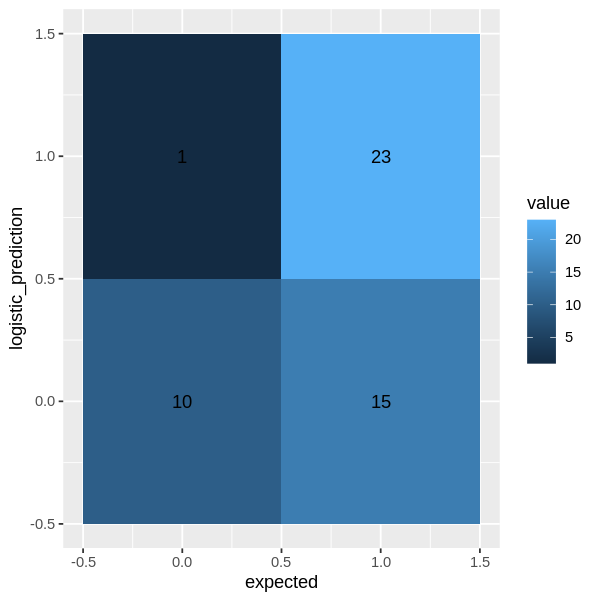

In [30]:
mat_log = melt(log_table)
plot2 = ggplot(data = mat_log, aes(x=expected, y=logistic_prediction, fill=value)) + geom_tile(aes(fill = value)) +  geom_text(aes(label = value))
plot2

Finding accuracy, precission and recall of 2 Models

In [31]:
acc_tree = sum(diag(tree_table))/sum(tree_table)
acc_log = sum(diag(log_table))/sum(log_table)
print(acc_tree)
print(acc_log)

[1] 0.8979592
[1] 0.6734694


In [32]:
pre_log = log_table[2,2]/(log_table[2, 2]+log_table[1, 2])
pre_tree = tree_table[2,2]/(tree_table[2, 2]+tree_table[1, 2])
print(pre_log)
print(pre_tree)

[1] 0.9583333
[1] 0.9230769


In [33]:
re_log = log_table[2, 2]/(log_table[2, 2]+log_table[2, 1])
re_tree = tree_table[2, 2]/(tree_table[2, 2]+tree_table[2, 1])
print(re_log)
print(re_tree)

[1] 0.6052632
[1] 0.9473684
